In [1]:
import pandas as pd
import numpy as np
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import json
import pywt
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

In [2]:
# train.csv
train_df = pd.read_csv("train.csv")
train_df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [3]:
# test.csv
test_df = pd.read_csv("test.csv")
test_df.head()

id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1

In [4]:
# sample_submission.csv
sample_df = pd.read_csv("sample_submission.csv")
sample_df.head()

id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
train_df.shape

(913000, 4)

In [7]:
train_df.store.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [8]:
train_df.isnull().sum().sum()

0

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [10]:
test_df.shape

(45000, 4)

In [11]:
test_df.store.value_counts()

1     4500
2     4500
3     4500
4     4500
5     4500
6     4500
7     4500
8     4500
9     4500
10    4500
Name: store, dtype: int64

In [12]:
test_df.isnull().sum().sum()

0

# Data Preparation

In [13]:
from datetime import datetime

def convertYMD(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = [i.year for i in df['date']]
    df['month'] = [i.month for i in df['date']]
    df['day'] = [i.day for i in df['date']]

In [14]:
convertYMD(train_df)
train_df.head()

date  store  item  sales  year  month  day
0 2013-01-01      1     1     13  2013      1    1
1 2013-01-02      1     1     11  2013      1    2
2 2013-01-03      1     1     14  2013      1    3
3 2013-01-04      1     1     13  2013      1    4
4 2013-01-05      1     1     10  2013      1    5

In [15]:
train_df.year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: year, dtype: int64

In [16]:
train_df.month.value_counts()

1     77500
3     77500
5     77500
7     77500
8     77500
10    77500
12    77500
4     75000
6     75000
9     75000
11    75000
2     70500
Name: month, dtype: int64

In [17]:
train_df.day.value_counts().sort_index()

1     30000
2     30000
3     30000
4     30000
5     30000
6     30000
7     30000
8     30000
9     30000
10    30000
11    30000
12    30000
13    30000
14    30000
15    30000
16    30000
17    30000
18    30000
19    30000
20    30000
21    30000
22    30000
23    30000
24    30000
25    30000
26    30000
27    30000
28    30000
29    28000
30    27500
31    17500
Name: day, dtype: int64

In [18]:
train_df.item.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item, dtype: int64

In [19]:
train_df.sales.value_counts().sort_index()

0        1
1        4
2       25
3       91
4      215
      ... 
208      1
209      1
210      1
214      1
231      1
Name: sales, Length: 213, dtype: int64

In [20]:
# drop id column
test_df.drop('id', axis=1, inplace=True)

In [21]:
convertYMD(test_df)
test_df.head()

date  store  item  year  month  day
0 2018-01-01      1     1  2018      1    1
1 2018-01-02      1     1  2018      1    2
2 2018-01-03      1     1  2018      1    3
3 2018-01-04      1     1  2018      1    4
4 2018-01-05      1     1  2018      1    5

In [22]:
test_df.year.value_counts()

2018    45000
Name: year, dtype: int64

In [23]:
test_df.month.value_counts()

1    15500
3    15500
2    14000
Name: month, dtype: int64

In [24]:
test_df.day.value_counts()

1     1500
2     1500
28    1500
27    1500
26    1500
25    1500
24    1500
23    1500
22    1500
21    1500
20    1500
19    1500
18    1500
17    1500
16    1500
15    1500
14    1500
13    1500
12    1500
11    1500
10    1500
9     1500
8     1500
7     1500
6     1500
5     1500
4     1500
3     1500
29    1000
30    1000
31    1000
Name: day, dtype: int64

In [25]:
test_df.item.value_counts().sort_index()

1     900
2     900
3     900
4     900
5     900
6     900
7     900
8     900
9     900
10    900
11    900
12    900
13    900
14    900
15    900
16    900
17    900
18    900
19    900
20    900
21    900
22    900
23    900
24    900
25    900
26    900
27    900
28    900
29    900
30    900
31    900
32    900
33    900
34    900
35    900
36    900
37    900
38    900
39    900
40    900
41    900
42    900
43    900
44    900
45    900
46    900
47    900
48    900
49    900
50    900
Name: item, dtype: int64

In [26]:
test_df.store.value_counts().sort_index()

1     4500
2     4500
3     4500
4     4500
5     4500
6     4500
7     4500
8     4500
9     4500
10    4500
Name: store, dtype: int64

# EDA

Reference: https://medium.com/analytics-vidhya/how-to-guide-on-exploratory-data-analysis-for-time-series-data-34250ff1d04f

In [27]:
train_df.head()

date  store  item  sales  year  month  day
0 2013-01-01      1     1     13  2013      1    1
1 2013-01-02      1     1     11  2013      1    2
2 2013-01-03      1     1     14  2013      1    3
3 2013-01-04      1     1     13  2013      1    4
4 2013-01-05      1     1     10  2013      1    5

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


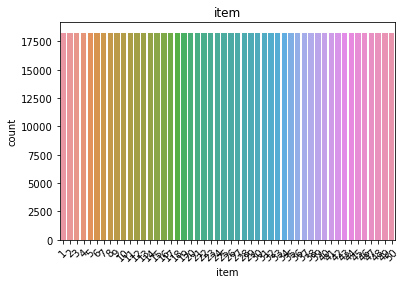

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


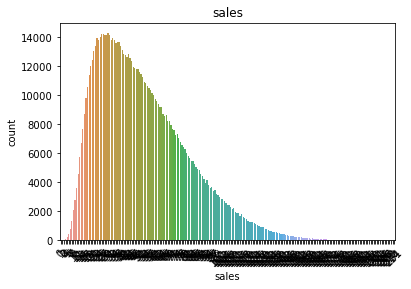

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


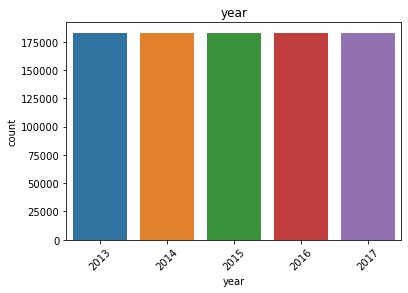

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


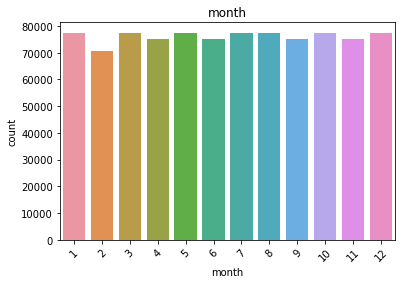

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


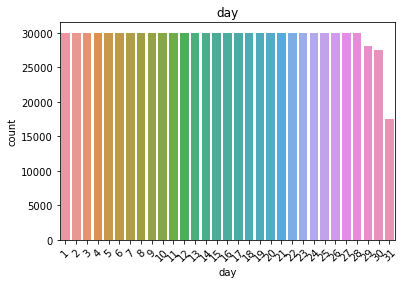

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


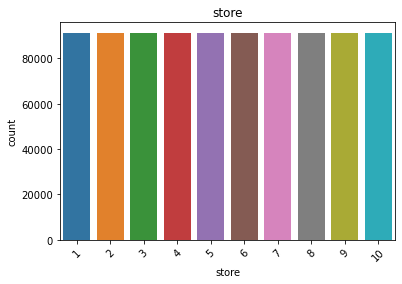

In [28]:
# past sales distribution
# display training data
for col in ['item','sales','year','month','day','store']:
    sns.countplot(train_df[col])
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()

In [29]:
train_df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

Observations from the Training data:

1. From 2013 to 2017, all 50 items has the same total count
2. The average amount of sales is 52 (though the total amount earned is unknown), with a relatively high std of 28.8. This means that some items may have been sold slightly better than other items. This can be further proven by the 75th percentile of values being 70, while the max is 231. This means that the data is top-heavy. 
3. Over 2013 to 2017, there were equal amount of sales data entries. This means that the sales entries are the same for each year. It seems that there have been no lapses of days for now. There may be lapses if the store closes on holidays or for other reasons. 
4. As for the day and month, no conclusions can be drawn from the data yet. This is due to the difference in the no. of days of each month. For example, February has 28 days while some months have 31 days which affects the count for each month. This is shown by the day count plot for Febraury (month 2). 

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


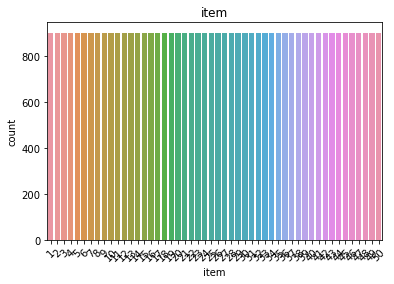

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


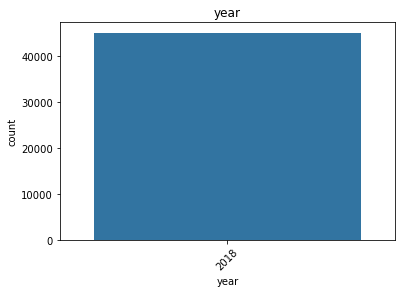

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


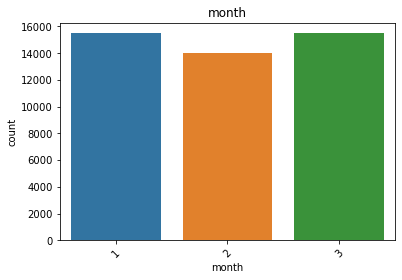

/Users/QianYi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


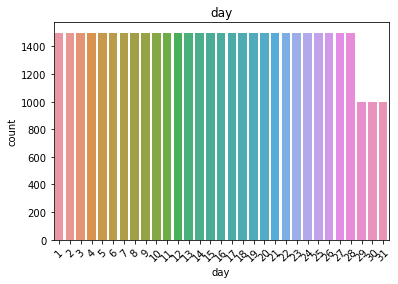

In [30]:
# display training data
for col in ['item','year','month','day']:
    sns.countplot(test_df[col])
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()

In [31]:
test_df['item'].describe()

count    45000.00000
mean        25.50000
std         14.43103
min          1.00000
25%         13.00000
50%         25.50000
75%         38.00000
max         50.00000
Name: item, dtype: float64

Let's now explore the test data given:
1. Total number of sales entries is 45000
2. Data provided only spans across 3 months (1, 2, 3)
3. Data given is for 2018 year, total number of days for each month will be different.

As of now, we cannot draw any conclusions for the test data as we have not identified any patterns.

In [32]:
train_df[train_df.item == 1]

date  store  item  sales  year  month  day
0     2013-01-01      1     1     13  2013      1    1
1     2013-01-02      1     1     11  2013      1    2
2     2013-01-03      1     1     14  2013      1    3
3     2013-01-04      1     1     13  2013      1    4
4     2013-01-05      1     1     10  2013      1    5
...          ...    ...   ...    ...   ...    ...  ...
18255 2017-12-27     10     1     19  2017     12   27
18256 2017-12-28     10     1     12  2017     12   28
18257 2017-12-29     10     1     23  2017     12   29
18258 2017-12-30     10     1     26  2017     12   30
18259 2017-12-31     10     1     27  2017     12   31

[18260 rows x 7 columns]

In [33]:
train_sorted = train_df.set_index('date')

In [34]:
train_sorted

store  item  sales  year  month  day
date                                            
2013-01-01      1     1     13  2013      1    1
2013-01-02      1     1     11  2013      1    2
2013-01-03      1     1     14  2013      1    3
2013-01-04      1     1     13  2013      1    4
2013-01-05      1     1     10  2013      1    5
...           ...   ...    ...   ...    ...  ...
2017-12-27     10    50     63  2017     12   27
2017-12-28     10    50     59  2017     12   28
2017-12-29     10    50     74  2017     12   29
2017-12-30     10    50     62  2017     12   30
2017-12-31     10    50     82  2017     12   31

[913000 rows x 6 columns]

In [35]:
train_sorted.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

# Analysis of sales for each item across the years


<AxesSubplot:xlabel='date'>

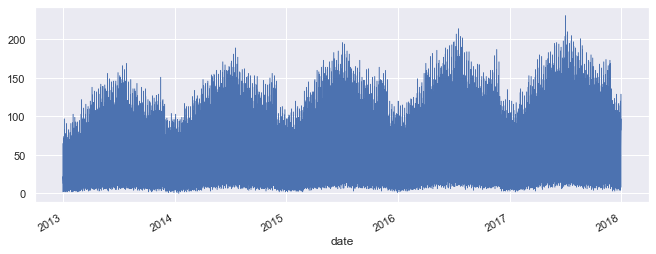

In [36]:
sns.set(rc={'figure.figsize':(11, 4)})
train_sorted['sales'].plot(linewidth=0.5)

/var/folders/ny/vyccgwl94n39q3y435x80g540000gn/T/ipykernel_13812/3963447043.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


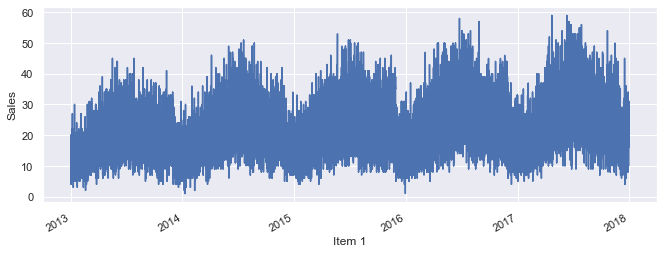

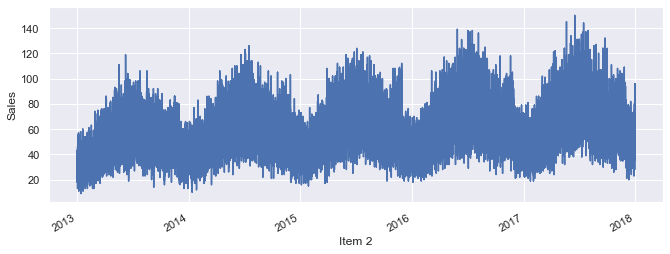

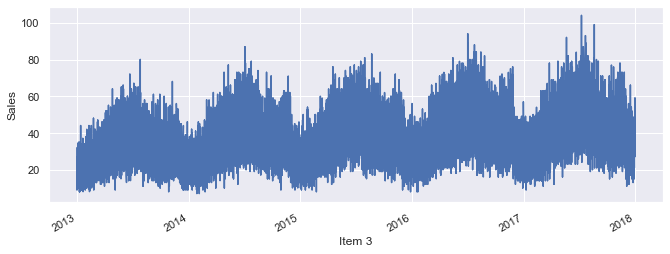

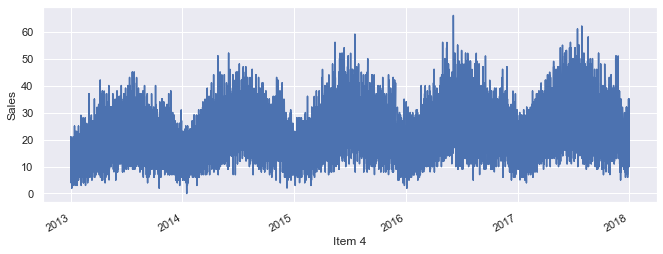

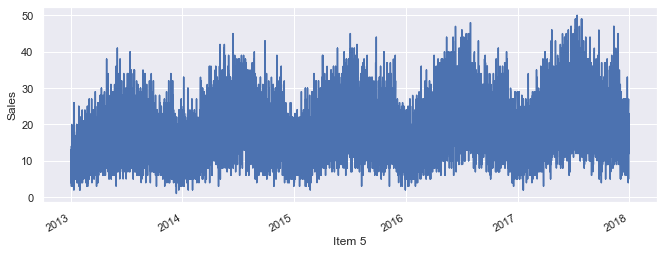

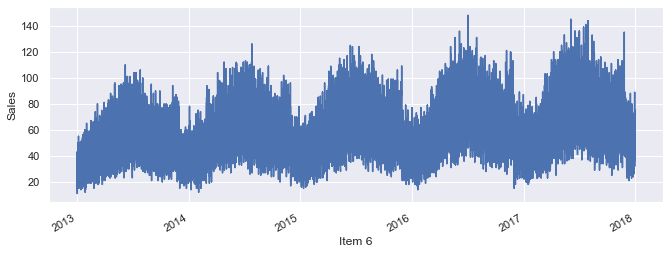

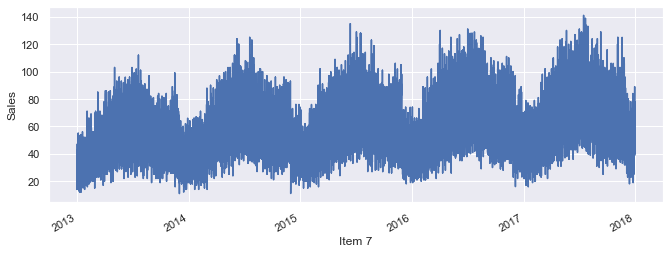

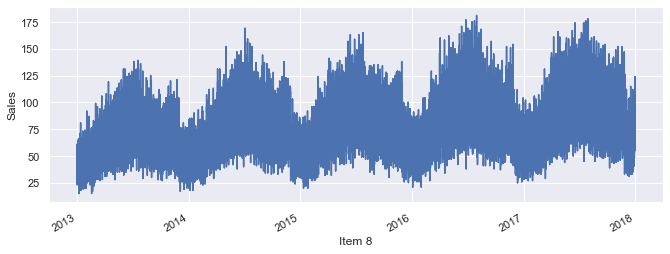

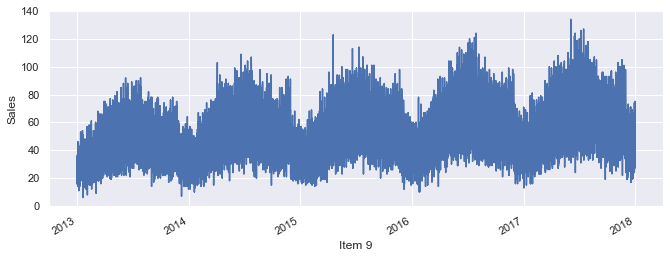

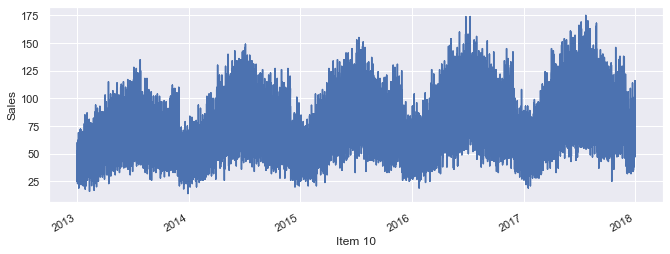

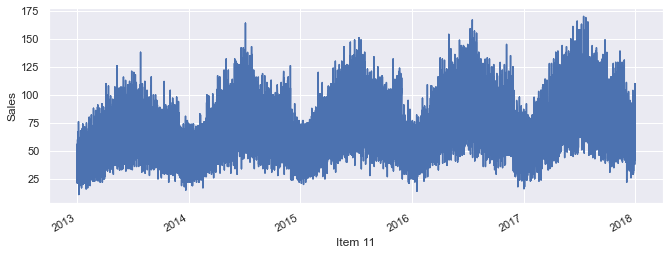

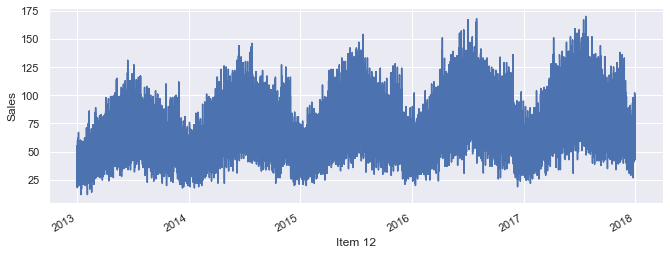

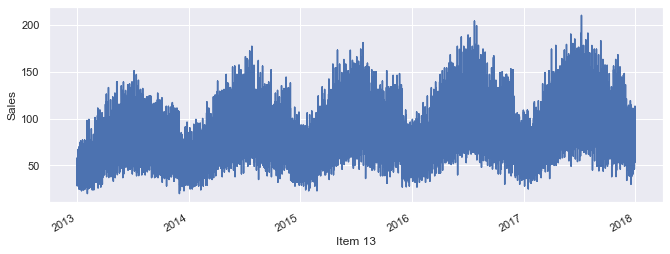

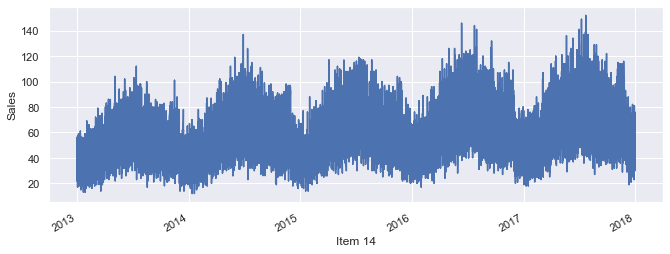

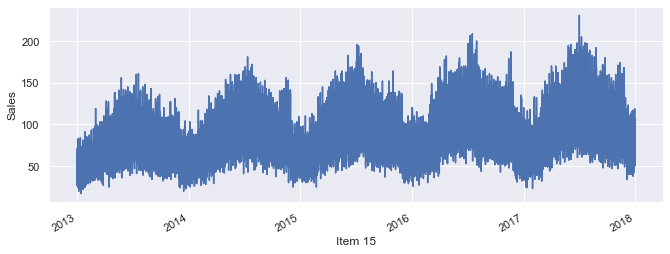

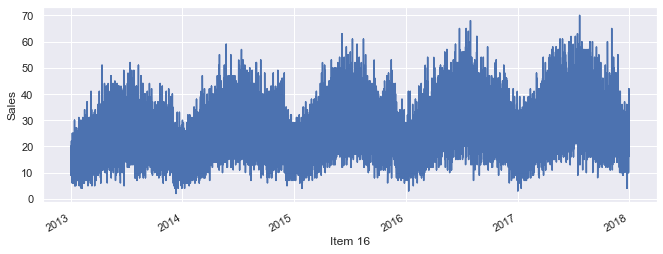

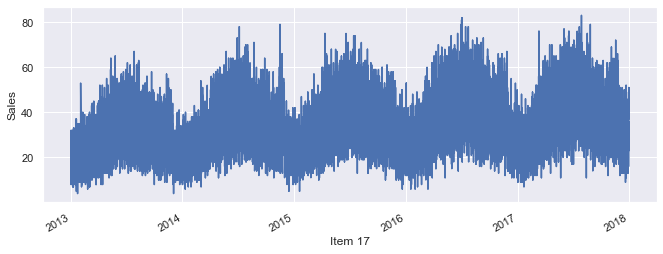

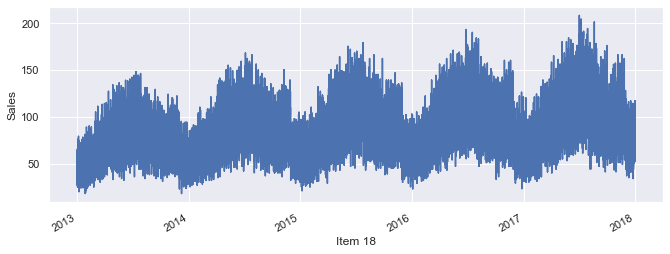

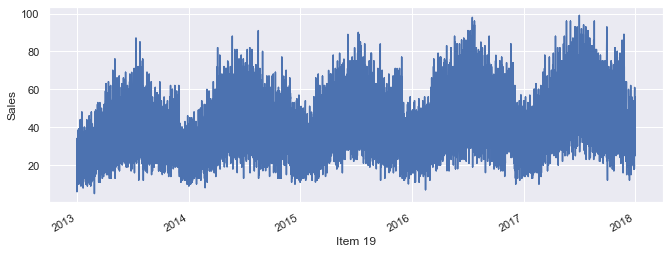

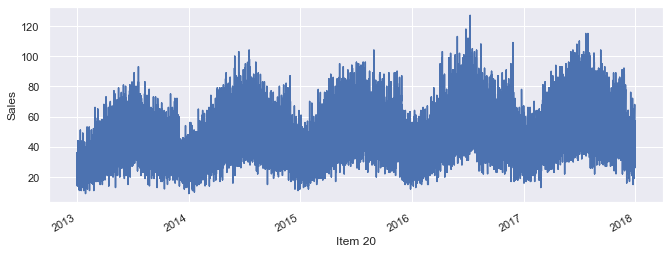

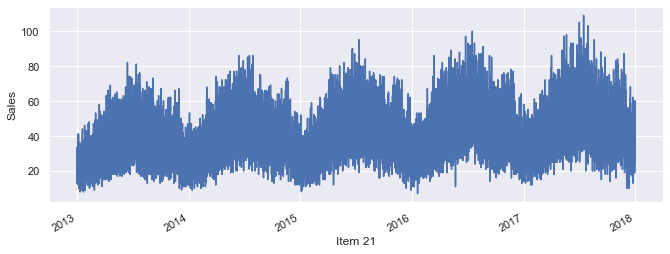

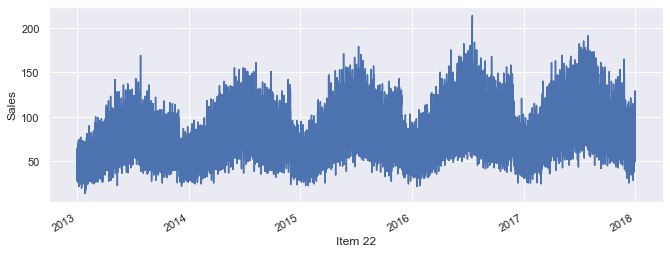

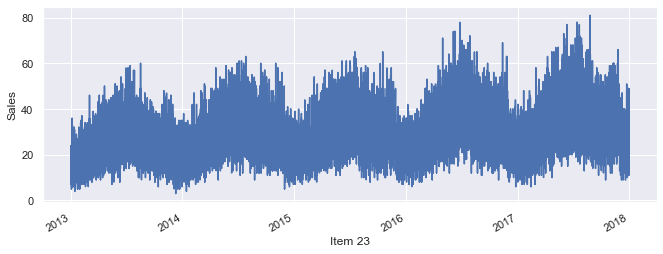

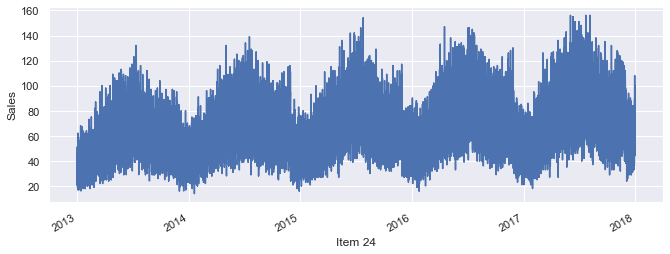

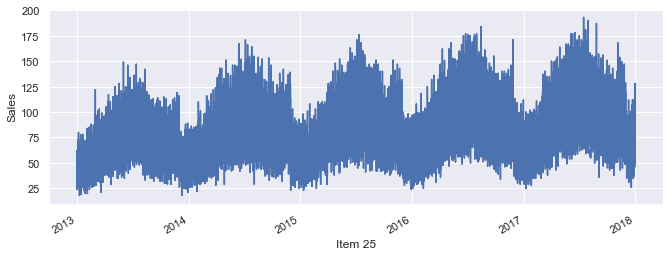

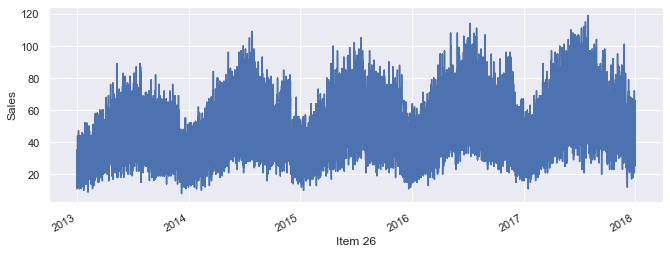

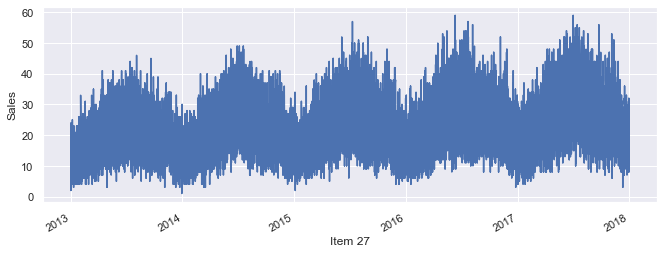

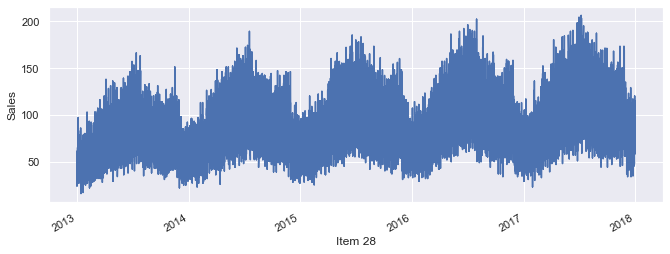

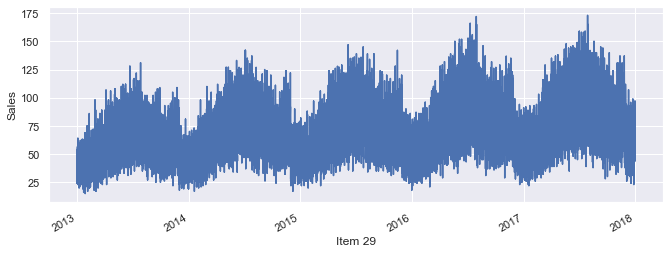

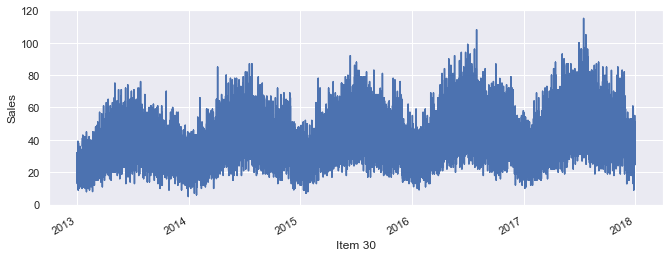

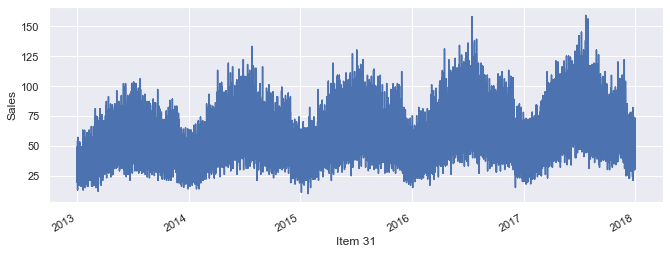

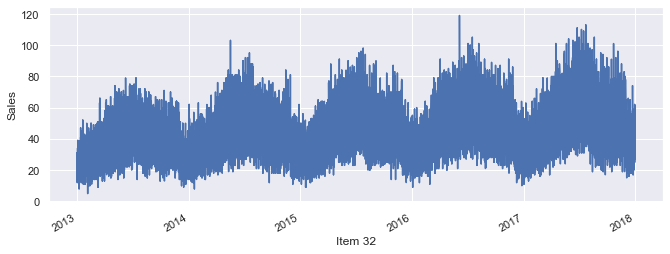

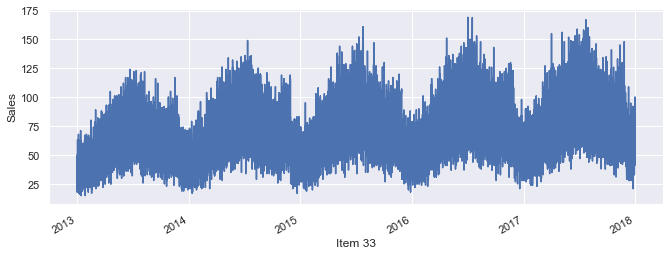

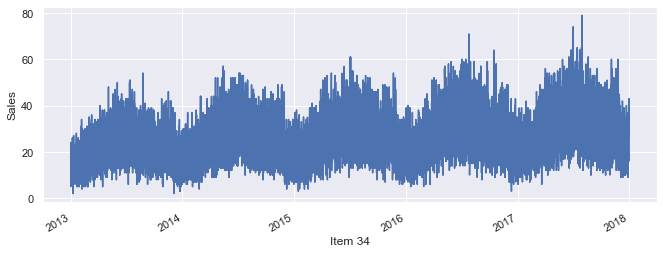

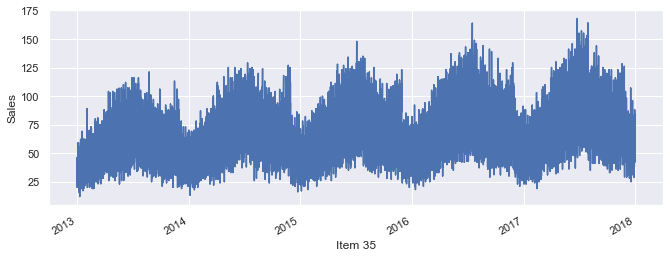

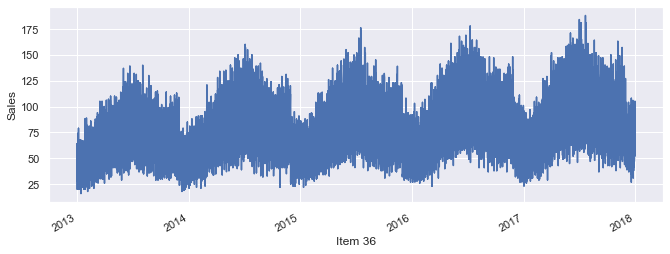

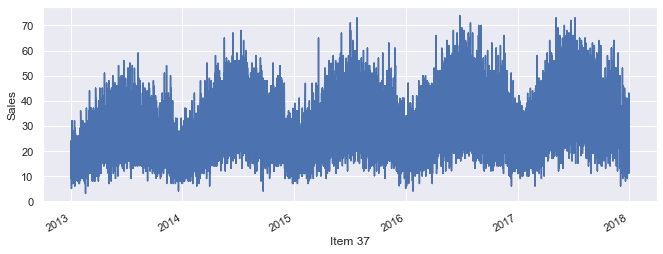

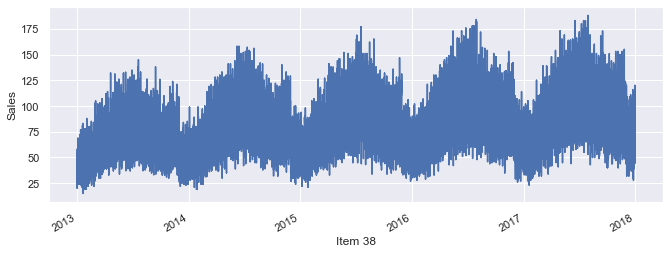

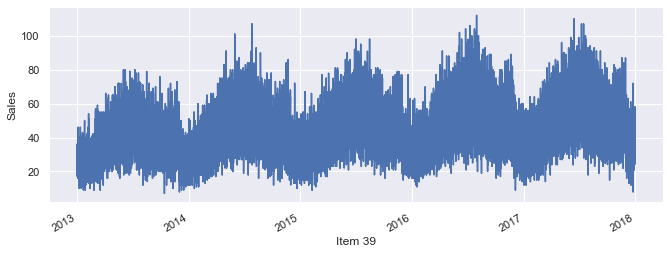

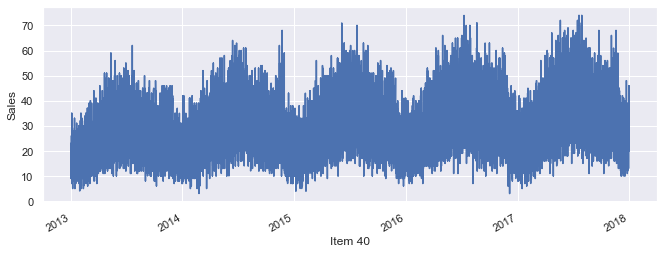

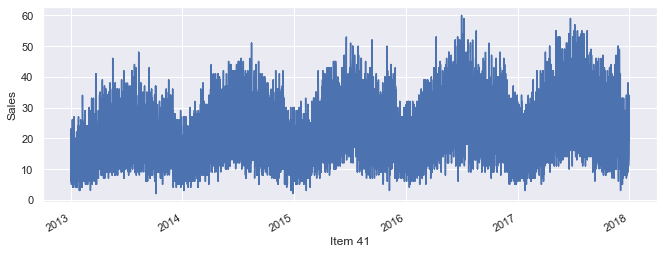

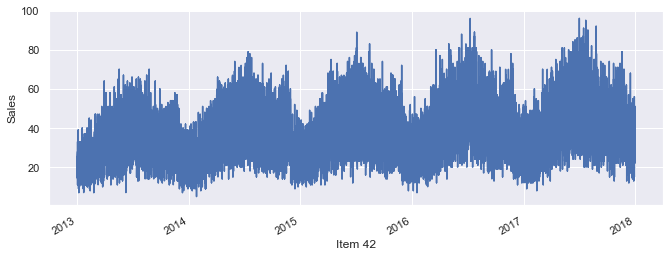

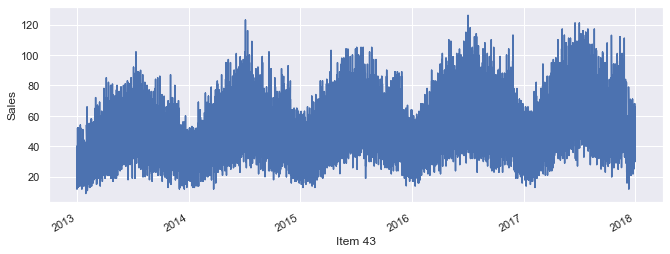

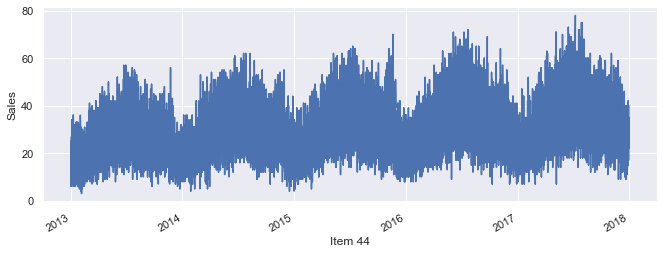

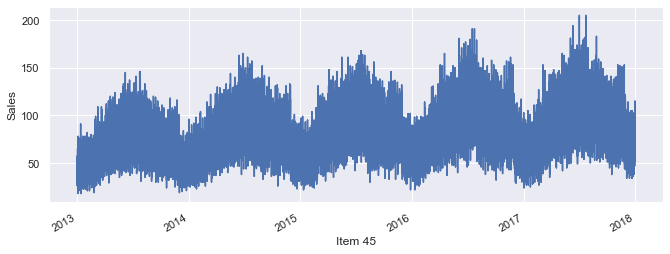

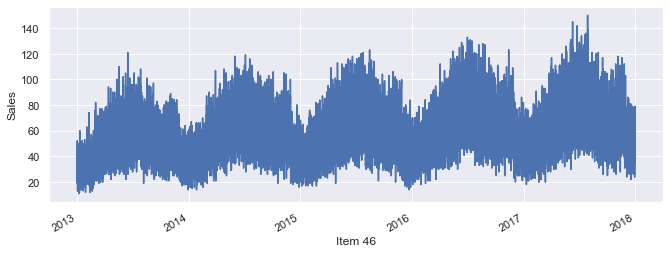

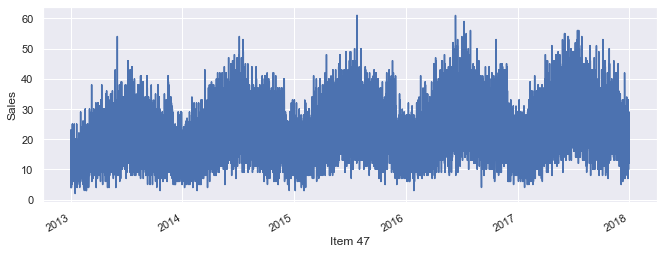

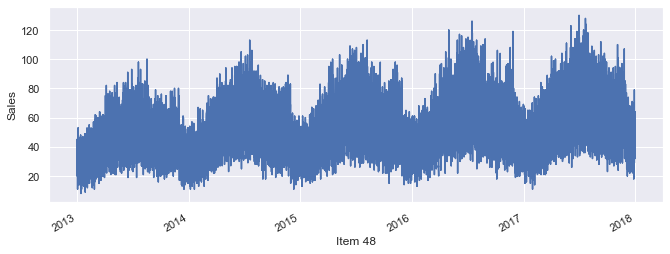

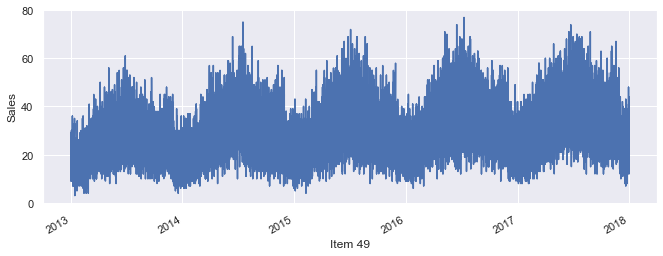

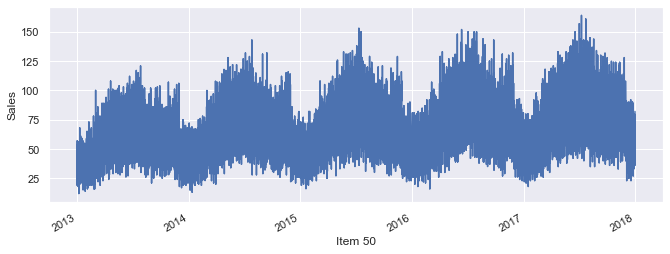

In [37]:
for x in range(1, 51, 1):
    fig, ax = plt.subplots()
    ax = train_sorted.loc[train_sorted['item'] == x, 'sales'].plot()
    ax.set_ylabel('Sales')
    a = str(x)
    ax.set_xlabel('Item '+ a)

# Analysis of individual store sales

In [38]:
# getting detailed analysis of each store data by assigning
# to find out if there are any clear differences between the stores
stores = {}
for i in range(1, 11):
    store_x = 'store' + str(i)
    store_i = store_x
    print(store_i)
    store_x = train_df[train_df.store == i]
    stores[store_i] = store_x

    print(store_x[['item','sales']].describe())

store1
               item         sales
count  91300.000000  91300.000000
mean      25.500000     47.268379
std       14.430949     24.006252
min        1.000000      1.000000
25%       13.000000     28.000000
50%       25.500000     44.000000
75%       38.000000     63.000000
max       50.000000    155.000000
store2
               item         sales
count  91300.000000  91300.000000
mean      25.500000     67.033165
std       14.430949     33.595810
min        1.000000      3.000000
25%       13.000000     40.000000
50%       25.500000     62.000000
75%       38.000000     89.000000
max       50.000000    231.000000
store3
               item         sales
count  91300.000000  91300.000000
mean      25.500000     59.530602
std       14.430949     29.974102
min        1.000000      3.000000
25%       13.000000     35.000000
50%       25.500000     55.000000
75%       38.000000     80.000000
max       50.000000    196.000000
store4
               item         sales
count  91300.000000 

Observations:

ITEM
Overall, all the stores sold an equal amount of items and also share the exact parameters (shocking!). This is especially distinct when counting the total no. of items, which all add up to a total of 91,300 (as shown under 'count'). The max is 50 items for all stores and given that they all have an std of 14.4, we can assume that the column for items are exactly the same for all stores. 

SALES
Let's now explore the difference between sales for the different stores:

Store1:
mean = 47.268
sd = 24.006
min = 1
25% = 28
50% = 44
75% = 63
max = 155

Store2:
mean = 67.03
sd = 33.60
min = 3
25% = 40
50% = 62
75% = 89
max = 231

Store 2 has the best performance out of all the stores. This can be seen from the sales data where even the 25th percentile of 40 is higher than all the other stores. Also, Store 2 had a max of 231 sales for an item. Given the high std, we can tell that an item was selling much better compared to other items.  

Store3:
mean = 59.53
sd = 29.97
min = 3
25% = 35
50% = 55
75% = 80
max = 196

Store4:
mean = 54.903
sd = 27.73
min = 4
25% = 32
50% = 51
75% = 73
max = 186

Store5:
mean = 39.77
sd = 20.37
min = 2
25% = 23
50% = 37
75% = 53
max = 130

Store6:
mean = 39.73
sd = 20.31
min = 0
25% = 23
50% = 37
75% = 53
max = 134

Store 6's min was 0, which means that there was an item that they were unable to sell. It is the only store that has this anomaly. However, it was still able to obtain an average performance compared to all the other stores. 

Store7:
mean = 36.36
sd = 18.68
min = 1
25% = 21
50% = 34
75% = 49
max = 122

Store 7 performed the worst out of all the stores. Their std is also the lowest compared to the other stores. We can conclude that the store has no single item that stands out in terms of sales since the std is relatively low. 

Store8:
mean = 64.14
sd = 32.23
min = 4
25% = 38
50% = 60
75% = 86
max = 204

Store 8 has pretty good performace (similar to Store 2), except that Store 8's performance is slightly lower in all aspects (min, 25%, 50%, 75% & max). Store 8's std is also slightly lower, meaning that the sales is not as spread out compared to Store 2.

Store9:
mean = 55.05
sd = 27.83
min = 4
25% = 32
50% = 51
75% = 74
max = 195

Store10:
mean = 58.71
sd = 29.55
min = 3
25% = 35
50% = 54
75% = 78
max = 187

Ranking of the stores performance based on average:
Stores 5 and 6 performed almost identically
[2,8,10,3,9,4,1,5,6,7]

# Analysis of sales for each item in each store across the years

store1
store2
store3
store4
store5
store6
store7
store8
store9
store10


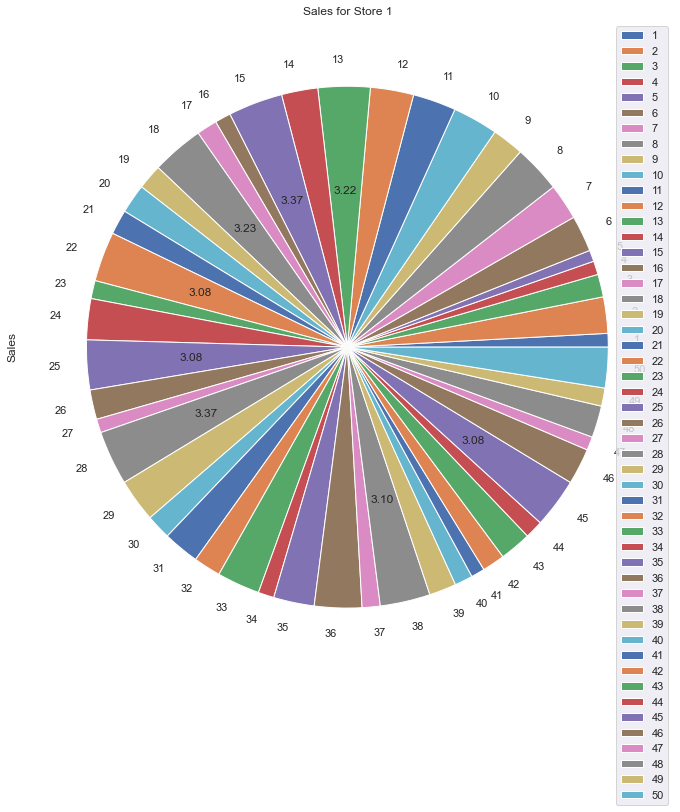

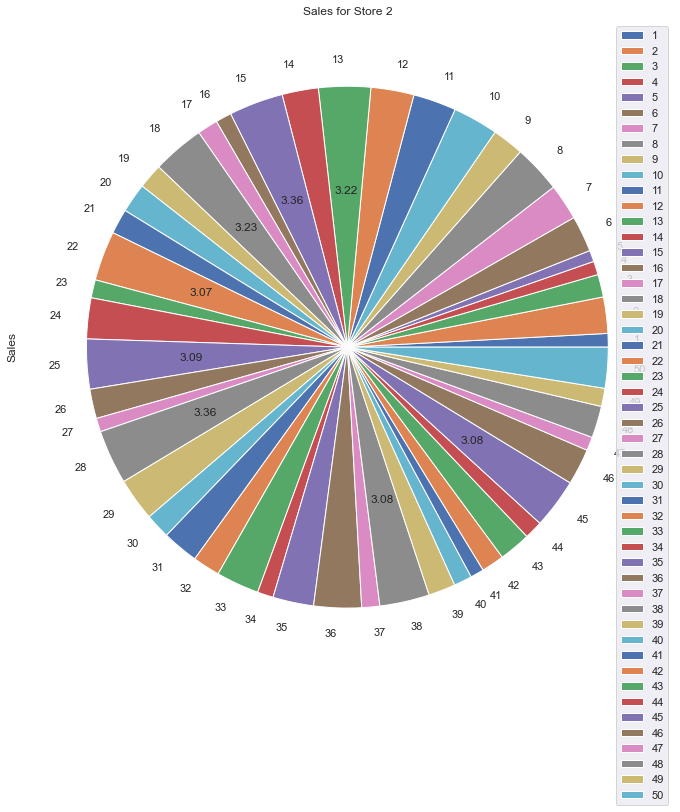

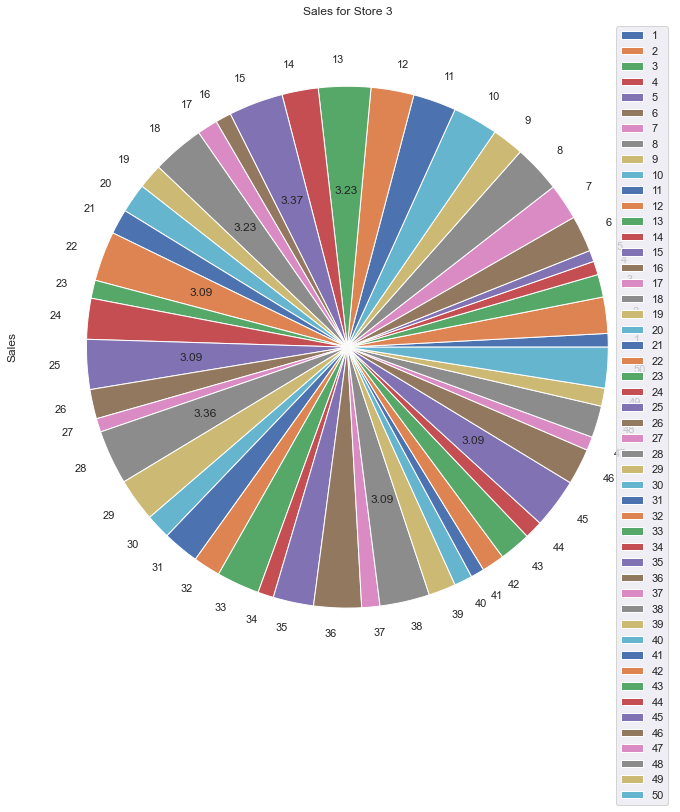

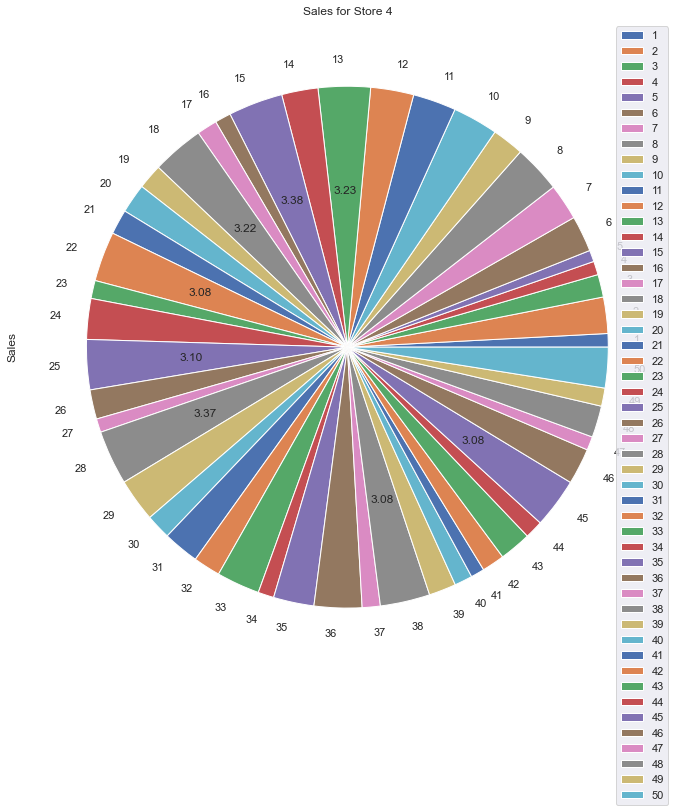

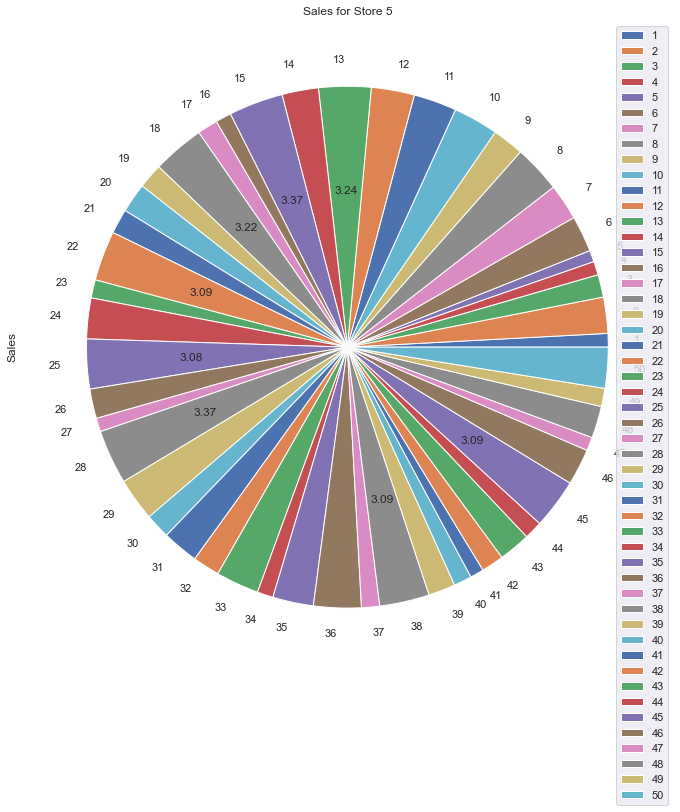

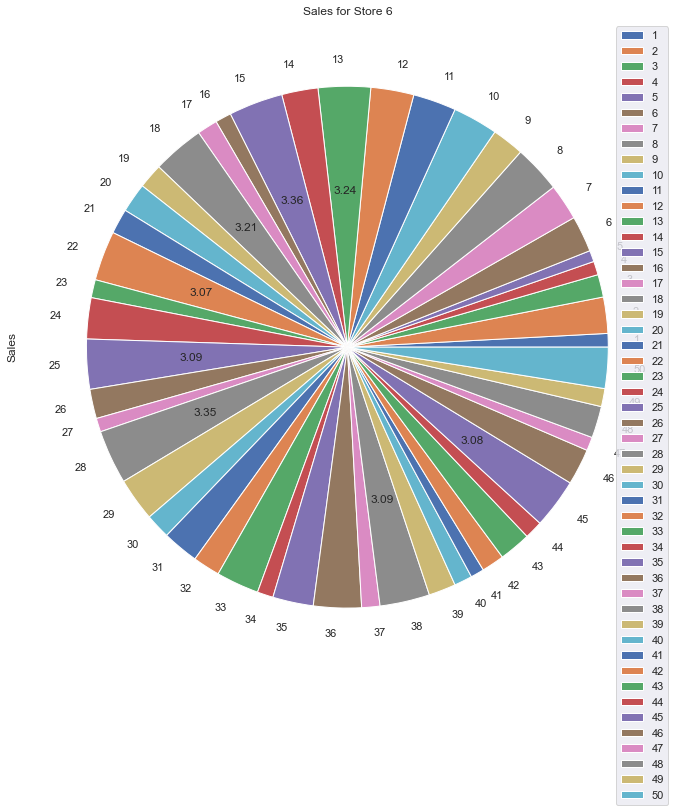

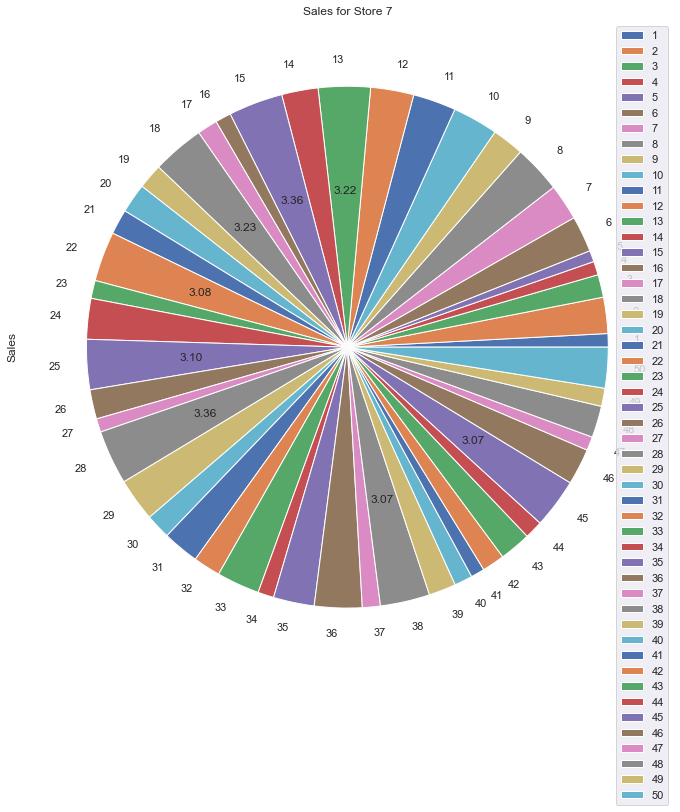

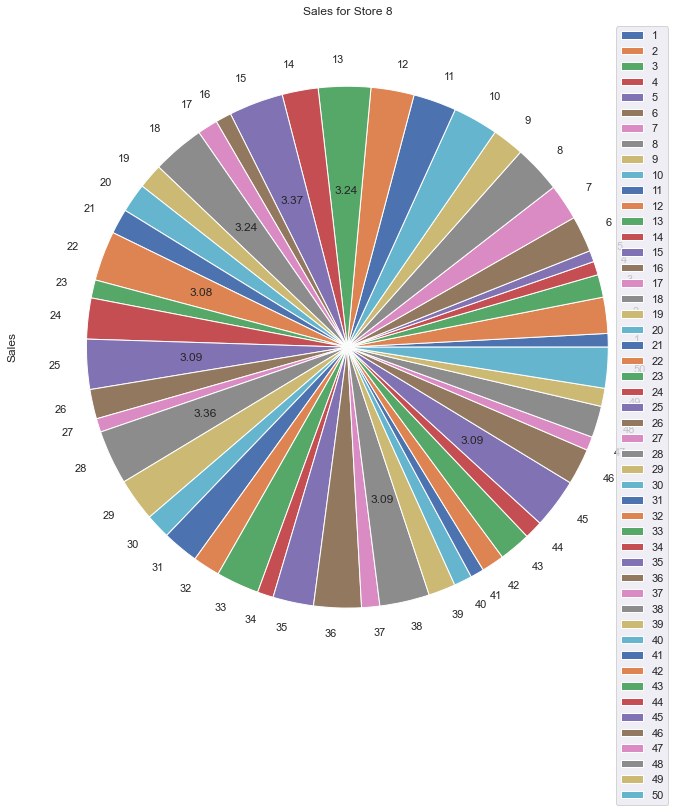

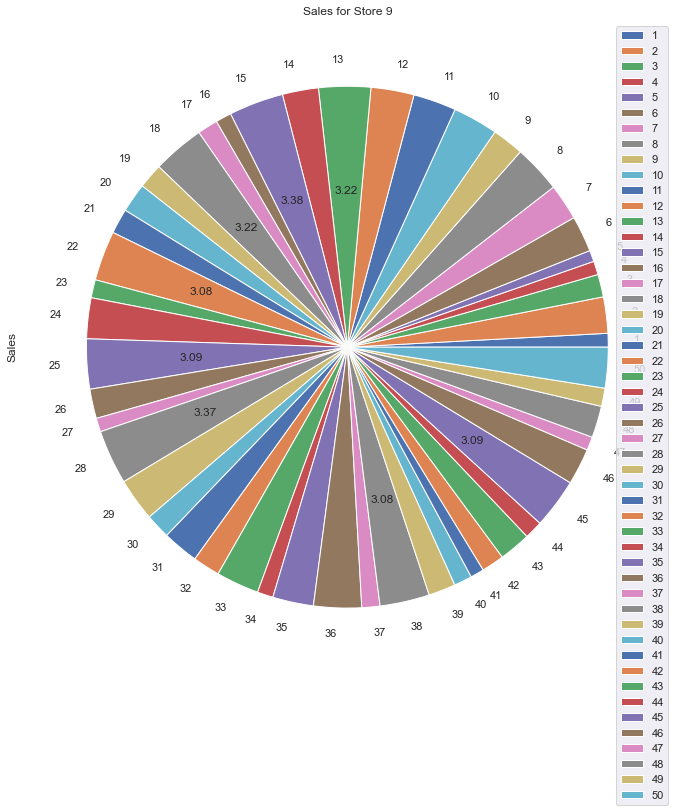

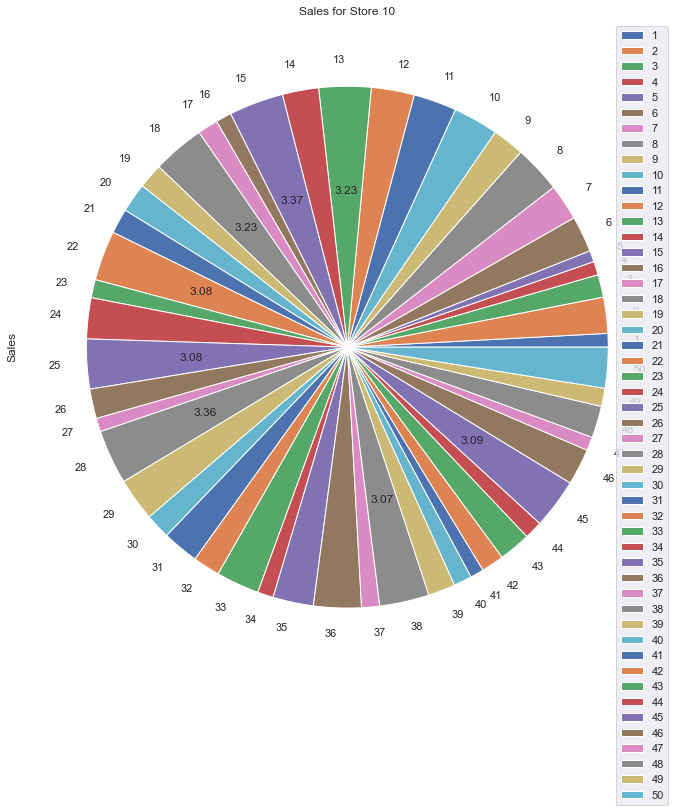

In [39]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 3 else ''  

for i in range(1,11):
    store_i = 'store' + str(i)
    df = stores.get(store_i)
    print(store_i)

    # initialize sums
    sums = [] 
    for x in range(1,51,1):
        store_item = df[(df.item == x)]
        sums.append(int(store_item['sales'].sum()))
        data = { 'Sales' : sums }
        store_i = DataFrame(data, columns = ['Sales'])

    store_i.insert(0, 'item', range(1, 51))
    title = 'Sales for Store ' + str(i)
    store_i.groupby(['item']).sum().plot(kind='pie',title=title, y='Sales', autopct=autopct, figsize=(28,12))

From the individual pie charts of each store's sales, it can be observed that the 4 items with the highest sales are items 13,15,18 and 28.

# Analysis of cumulative sales for each month across the years

<AxesSubplot:xlabel='month'>

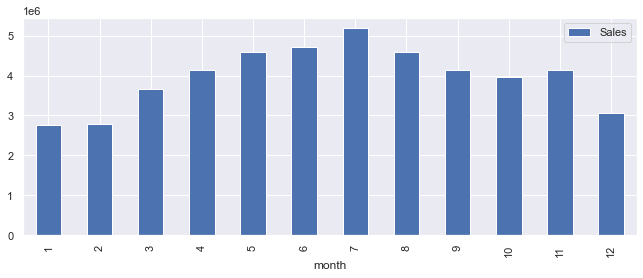

In [40]:
sums = []
for x in range(1,13,1):
    printer = train_sorted[(train_sorted.month == x)]
    sums.append(int(printer['sales'].sum()))
    data = {'Sales' : sums}
    monthdf = DataFrame(data, columns=['Sales'])
    
monthdf.insert(0, 'month', range(1, 13))   
monthdf.plot(kind="bar",x='month',y='Sales')


From the bar chart of the total sales across the years for each month, it can be seen that the month of July has the highest total sales, followed by June and May.

# Denoising Data

store1_item44


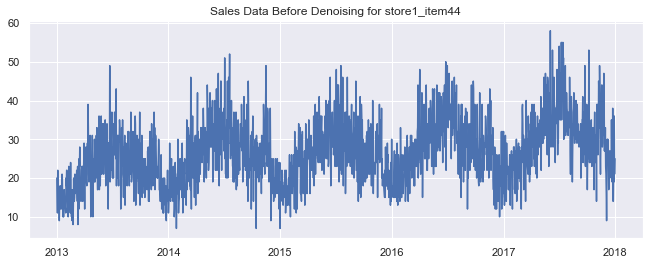

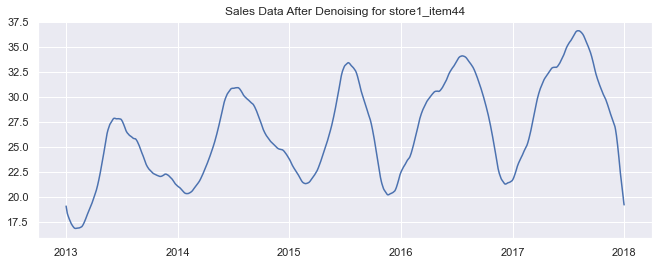

store2_item42


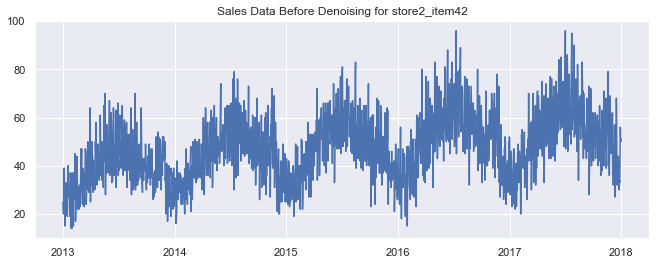

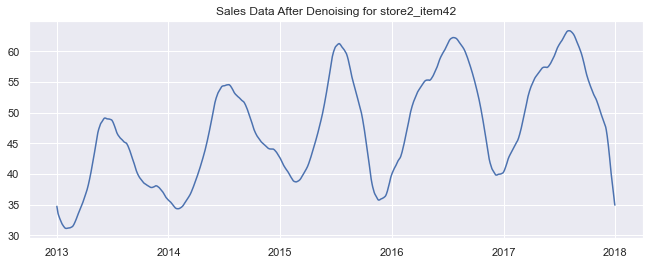

store3_item24


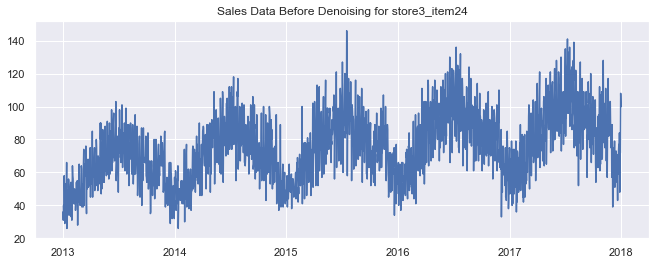

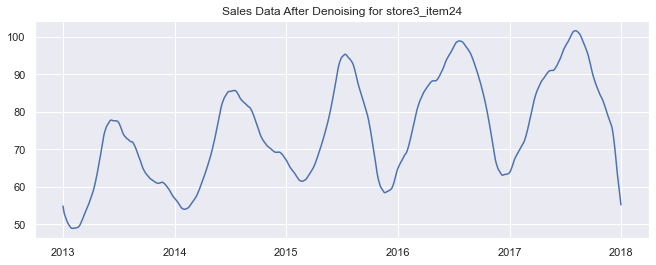

store4_item15


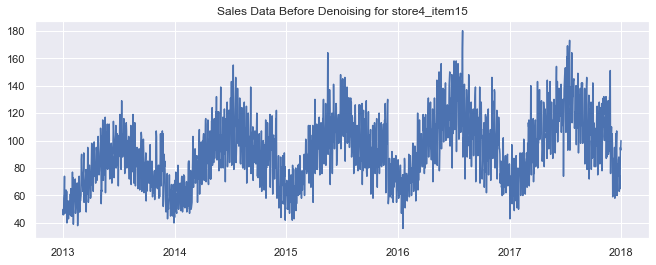

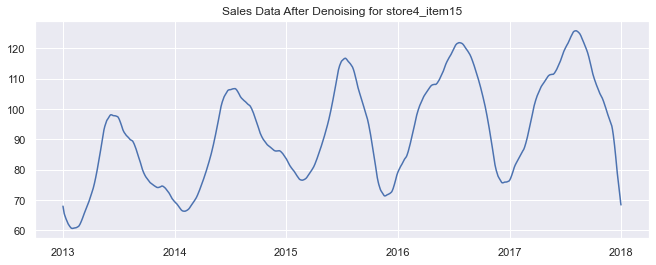

store5_item2


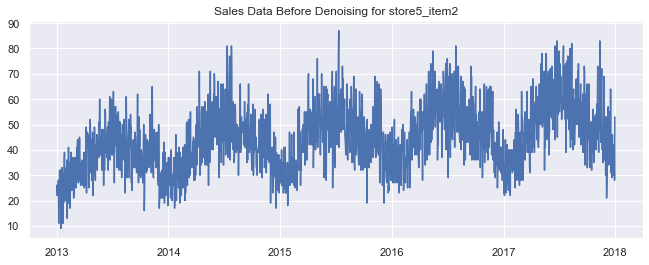

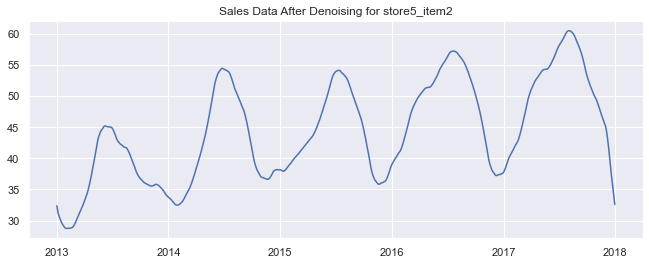

In [46]:
import random
store = 1
total_plots = {}

while store < 6:
    item = random.randint(1,50)
    
    store_x = 'store' + str(store)
    store_i = store_x
    
    store_x_item_x = store_x + '_item' + str(item)
    

    store_x_df = train_df[train_df.store == store]
    store_x_item_x_df = store_x_df[store_x_df.item == item]

    print(store_x_item_x)

    plt.plot(store_x_item_x_df['date'], store_x_item_x_df['sales'])
    plt.title('Sales Data Before Denoising for '+ store_x_item_x)
    plt.show()
    
    item_sales = store_x_item_x_df['sales']
    coeff = pywt.wavedec(item_sales, 'db4', mode="per")
    mean_coeff=np.mean([abs(ele-np.mean(item_sales)) for ele in item_sales])
    sigma = (1/0.6745)*mean_coeff
    threshhold=sigma*np.sqrt(2*np.log(len(item_sales)))
    coeff[1:] = (pywt.threshold(i, value=threshhold, mode='hard') for i in coeff[1:])
    item_sales_wavelet_decomp=pywt.waverec(coeff, 'db4', mode='per')
    total_plots[store_x_item_x] = item_sales_wavelet_decomp
    
    plt.plot(store_x_item_x_df['date'], item_sales_wavelet_decomp)
    plt.title('Sales Data After Denoising for '+ store_x_item_x)
    plt.show()

    store += 1


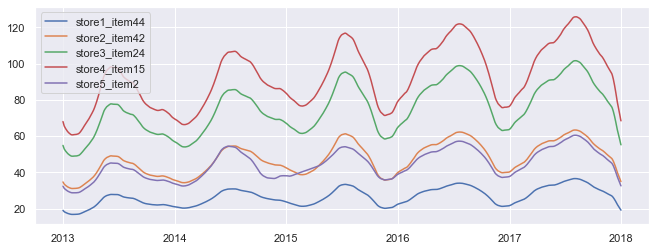

In [48]:
keys = list(total_plots.keys())

for key in keys:
    plt.plot(store_x_item_x_df['date'], total_plots[key],label = key)
    plt.legend()
plt.show()

From this graph, we can tell that the lines for store1, store4 and store5 are similar, which suggests that these 3 stores have similar performance